In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
sns.set()
#%matplotlib
#%matplotlib inline

In [40]:
def new_z(contigs):
    mean = contigs.mean(axis=0)
    fractions = mean/mean.sum()
    E = (contigs.sum(axis=1) * np.ones(contigs.shape).T).T * fractions
    alt_z = (contigs - E)/np.sqrt(E)
    return alt_z

def nucl_lists():
    """
    Generate lists of possible nucleotides
    
    Outputs:
    di_list - list of possible dinuclotides
    tri_list - list of possible trinuclotides
    tetra_list - list of possible tetranuclotides
    """
    
    nucl = ["A","T","C","G"]
    di_list = [i+j for i in nucl for j in nucl]
    tri_list = [i+j for i in di_list for j in nucl]
    tetra_list = [i+j for i in tri_list for j in nucl]

    return (di_list, tri_list, tetra_list)

In [94]:
counts = pd.read_csv("./pca1_tnf.csv")
labels = counts['genome']
labels = labels.values
counts = counts.drop('genome',axis=1)
c = counts.values
X = new_z(c)

In [95]:
pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

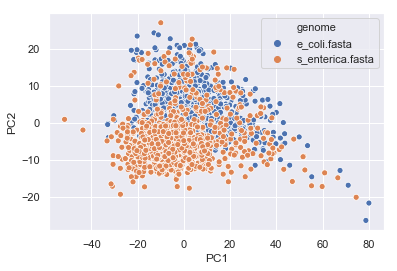

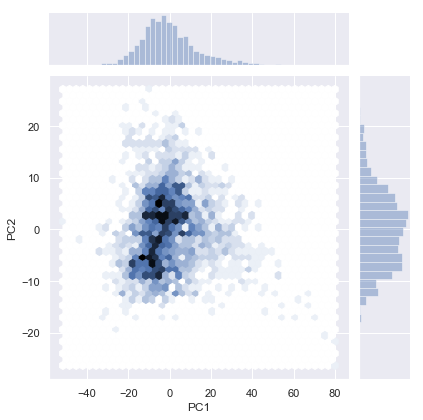

In [96]:
#PCA plot
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['genome']=labels

sns.scatterplot(x='PC1', y='PC2', hue='genome', data=pca_df)
sns.jointplot(x='PC1', y='PC2', data=pca_df, kind="hex")


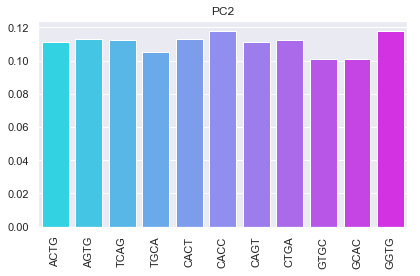

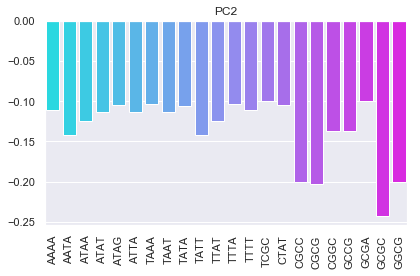

In [99]:
di_list, tri_list, tetra_list = nucl_lists()
features = np.c_[pca.components_[1], list(range(256))]

large = features[features[:,0] > 0.1]
small = features[features[:,0] < -0.1]
n = [tetra_list[int(i)] for i in large[:,1]]
g = sns.barplot(n,large[:,0],palette='cool')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('PC2')
plt.tight_layout()
plt.show()


m = [tetra_list[int(i)] for i in small[:,1]]
g = sns.barplot(m,small[:,0],palette='cool')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('PC2')
plt.tight_layout()
plt.show()

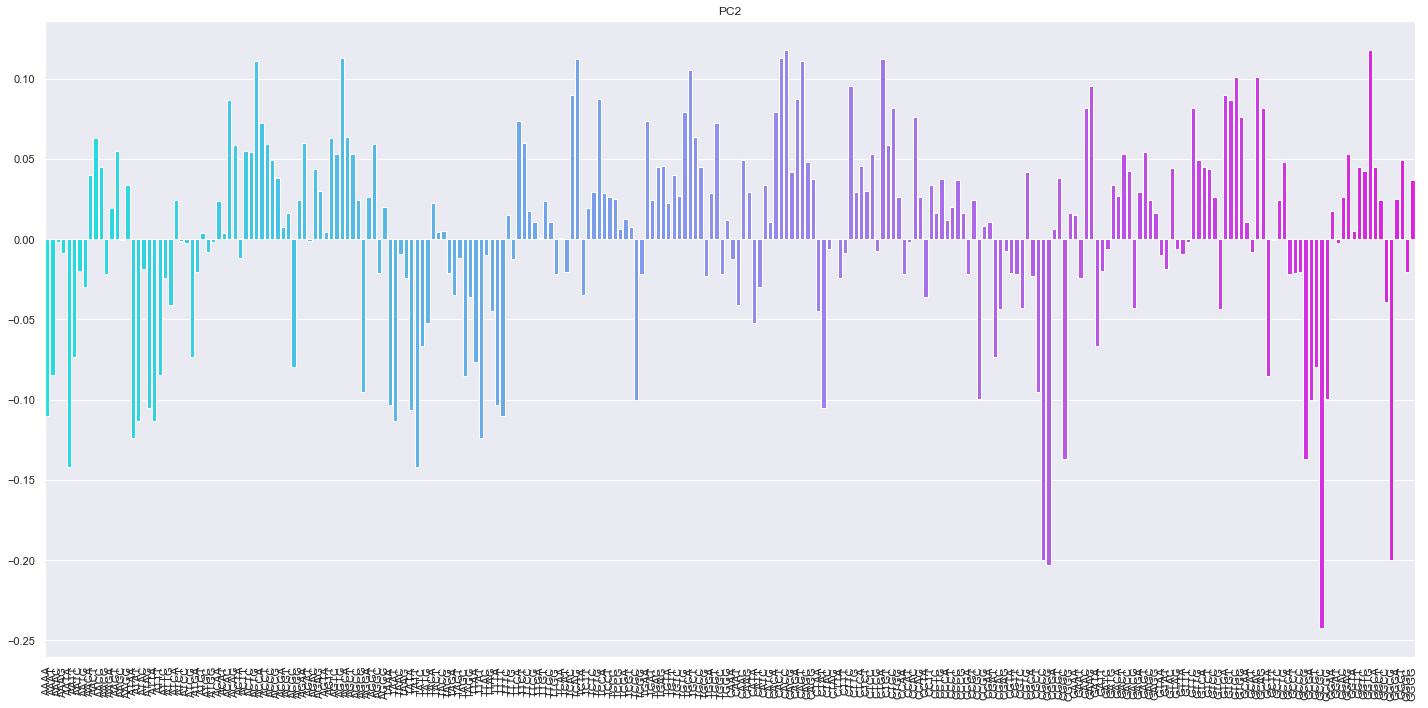

In [106]:
plt.figure(figsize=(20,10))
g = sns.barplot(tetra_list,pca.components_[1],palette='cool')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('PC2')
plt.tight_layout()